<a href="https://colab.research.google.com/github/sudhirtakke/Data-Augmentation/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE AUGMENTATION WHILE TRAINING DEEP LEARNING NEURAL NETWORKS
<center><img src = "https://algorithmia.com/blog/wp-content/uploads/2018/08/word-image-8.png"></center>

A technique that can be used to **artificially expand** the size of training dataset by **creating modified versions of images** in the dataset.<br><br>
Training deep learning neural network models on **more data can result in more skillful models**, and the augmnetation techniques can **create variations** of the images that can **improve the ability of the fit models** to generalize **what they have learned to new images**.<br><br>
The Keras deep learning neural network library provides the **capability to fit models** using image data augmentation via the _ImageDataGenerator_ class.


- Image data augmentation is used to expand the training dataset in order to **improve the performance and ability** of the model to generalize.
- Image data augmnetation is supported in the Keras deep learning library via the `ImageDataGenerator` class.
- How to use **shift**, **flip**, **brightness**, and **zoom** image data augmentation.

### Intent of Image Augmentation

Expand the training dataset with new, plausible examples.
This means, variations of the training set images that are likely to be seen by the model. For example:
- A horizontal flip of a picture of a cat may make sense, because the photo could have been taken from the left or right.
-  A vertical flip of the photo of a cat does not make sense and would probably not be appropriate given that the model is very unlikely to see a photo of an upside down cat.


It is clear that the choice of the specific data augmentation techniques used for a training datset must be chose carefully and within the context of the training dataset and knowledge of the problem domain.<br>
It can be useful in experiment with data augmentation methods in isolation and in concern to see if they result in a measurable improvement to model performance perhaps with a small prototype dataset, model, and training run.

Modern deep learning algorithms, such as CNN can learn features that are invariant to their location in the image.<br>
Augmeantation can further aid in this transform invariant approach to learning and can aid the model in learning features that are also invariant to transform such as left-to-right to top-to-bottom ordering, light levels in photographs, and more.

Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. This is different from data preparation such as image resizing and pixel scaling; they must be performed consistently across all datasets that interact with the model.

### CNN with Image Augmentation (__CIFAR100__)

---


images of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. In RGB, 32x32 pixels. The state of the art accuracy is 96.53 percent.


In [ ]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
#from tensorflow.examples.tutorials.mnist import input_data
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

__Note__: Replace "__--------__" with the your python code.

#  from keras imprort the cifar100 dataset

In [ ]:
from keras.datasets import cifar10

##  Load the cifar image dataset.

In [ ]:
#load data

def load_data():
  
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  return x_train,y_train,x_test,y_test



In [ ]:
x_train,y_train,x_test,y_test=load_data()

img_rows, img_cols , channels= 32,32,3


In [ ]:
x_train.shape

(50000, 32, 32, 3)

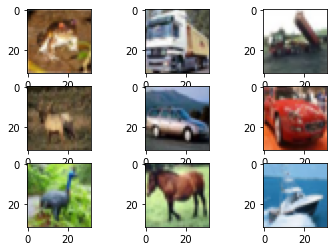

In [ ]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()



###  Setup the image augmentation dimensions,   width_shift=0.5, height_shift=0.5

In [ ]:
# set up image augmentation

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

###   Plot the augmented  image

In [ ]:
# see example augmentation images

def augmented_image():
  for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
      for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
      plt.show()
      break
      

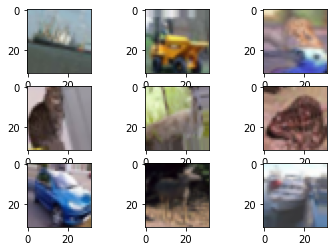

In [ ]:
augmented_image()

In [ ]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [ ]:
# labels
num_classes=100


### Converts the class vector (integers) to binary class matrix.

In [ ]:
def change_to_categorical():
  y_train1 = k.utils.to_categorical(y_train, num_classes)
  y_test1 = k.utils.to_categorical(y_test, num_classes)
  return y_train1,y_test1


In [ ]:
y_train,y_test=change_to_categorical()

In [ ]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
# build and compile the model  (roughly following the VGG paper)

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.3
drop_conv=0

model = Sequential()


###  Create the model by adding different convolutional layer.

In [ ]:
def model_creation():
  model = Sequential()

  model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
  model.add(Dropout(drop_conv))

  model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
  model.add(Dropout(drop_conv))

  model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
  model.add(Dropout(drop_conv))

  model.add(Flatten())
  model.add(Dense(512, activation=ac,kernel_regularizer=reg))
  model.add(BatchNormalization())
  model.add(Dropout(drop_dense))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)  

  return model

In [ ]:
model=model_creation()

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_50 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)       

### Train the model with batch size =128 and number of epochs=20

In [ ]:
# training without augmentation
# initially trained for 100 epochs

def model_fit():
  history=model.fit(x_train, y_train, batch_size= 128, epochs=20, validation_data=(x_test, y_test))
  return history

In [ ]:
history=model_fit()

Epoch 1/20
391/391 [==============================] - 21s 36ms/step - loss: 2.0225 - accuracy: 0.4579 - val_loss: 1.1872 - val_accuracy: 0.5899
Epoch 2/20
391/391 [==============================] - 13s 34ms/step - loss: 0.8342 - accuracy: 0.7087 - val_loss: 0.7986 - val_accuracy: 0.7350
Epoch 3/20
391/391 [==============================] - 13s 34ms/step - loss: 0.5977 - accuracy: 0.7896 - val_loss: 0.7443 - val_accuracy: 0.7516
Epoch 4/20
391/391 [==============================] - 13s 34ms/step - loss: 0.4770 - accuracy: 0.8335 - val_loss: 0.6642 - val_accuracy: 0.7806
Epoch 5/20
391/391 [==============================] - 13s 34ms/step - loss: 0.3740 - accuracy: 0.8703 - val_loss: 0.7447 - val_accuracy: 0.7654
Epoch 6/20
391/391 [==============================] - 13s 34ms/step - loss: 0.3071 - accuracy: 0.8923 - val_loss: 0.7135 - val_accuracy: 0.7961
Epoch 7/20
391/391 [==============================] - 14s 35ms/step - loss: 0.2316 - accuracy: 0.9193 - val_loss: 0.6684 - val_accuracy:

### Question 8: Evaluate the model performance

In [ ]:
#training accuracy without dropout

def mode_accuracy():
  train_acc=model.evaluate(x_train,y_train,batch_size=128)
  return train_acc

In [ ]:
mode_accuracy()

391/391 [==============================] - 4s 11ms/step - loss: 0.0461 - accuracy: 0.9845


[0.04608801752328873, 0.9845399856567383]

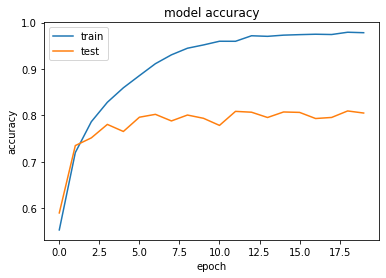

In [ ]:
plothist(history)

In [ ]:
#model.save('cifar100_01.h5')                  
#model=load_model('cifar100_01.h5')

###  Build again a new model but this time using ridge regularization technique.

In [ ]:
def L2_regularizer():
  reg=None   # L2 or "ridge" regularisation
  return reg

reg2=L2_regularizer

In [ ]:
reg2=None

In [ ]:
# build again, same model as model1

num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

In [ ]:
# train with image augmentation
# initially it is trained for 100 epochs
history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=2, validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
390/390 [==============================] - 38s 93ms/step - loss: 2.4377 - accuracy: 0.3837 - val_loss: 1.2043 - val_accuracy: 0.5777
Epoch 2/2
390/390 [==============================] - 36s 91ms/step - loss: 1.1750 - accuracy: 0.5901 - val_loss: 0.9443 - val_accuracy: 0.6823


In [ ]:
#model2.save('cifar100_02.h5')         #90.26, (128 batch, 0.001 lr, 512 neurons, no zoom, no convdrop, only 0.1 shift) 

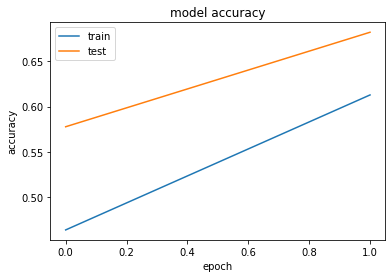

In [ ]:
plothist(history2)  # 128 batch, 0.001 lr, 512 neurons, no zoom, no convdrop, only 0.1 shift

In [ ]:
model2_test_acc=model2.evaluate(x_test,y_test,batch_size=128)
model2_test_acc

79/79 [==============================] - 1s 12ms/step - loss: 0.9443 - accuracy: 0.6823


[0.9442733526229858, 0.6822999715805054]

In [ ]:
model2_train_acc=model2.evaluate(x_train,y_train,batch_size=128)
model2_train_acc

391/391 [==============================] - 4s 11ms/step - loss: 0.9083 - accuracy: 0.6860


[0.9083389639854431, 0.6859999895095825]